# Reticulate

### Pacote que permite a integração do R e do Python no mesmo ambiente, oference uma interface entre os dois.

In [1]:
# Instala o Reticulate em uma localização específica
install.packages("reticulate", lib = "C:/Users/estagiario.nti02/AppData/Local/R/win-library/4.5")

# Carrega o pacote para o ambiente, considerando que ele já foi instalado acima
library(reticulate)

pacote 'reticulate' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Users\estagiario.nti02\AppData\Local\Temp\Rtmp4AhVdL\downloaded_packages


In [2]:
# Exibe informações sobre a configuração atual do Python no ambiente R
py_config()

python:         C:/Users/estagiario.nti02/AppData/Local/R/cache/R/reticulate/uv/cache/archive-v0/lGdNWGmoHG3El018YVgH5/Scripts/python.exe
libpython:      C:/Users/estagiario.nti02/AppData/Local/R/cache/R/reticulate/uv/python/cpython-3.11.12-windows-x86_64-none/python311.dll
pythonhome:     C:/Users/estagiario.nti02/AppData/Local/R/cache/R/reticulate/uv/cache/archive-v0/lGdNWGmoHG3El018YVgH5
virtualenv:     C:/Users/estagiario.nti02/AppData/Local/R/cache/R/reticulate/uv/cache/archive-v0/lGdNWGmoHG3El018YVgH5/Scripts/activate_this.py
version:        3.11.12 (main, Apr  9 2025, 04:03:34) [MSC v.1943 64 bit (AMD64)]
Architecture:   64bit
numpy:          C:/Users/estagiario.nti02/AppData/Local/R/cache/R/reticulate/uv/cache/archive-v0/lGdNWGmoHG3El018YVgH5/Lib/site-packages/numpy
numpy_version:  2.2.5

NOTE: Python version was forced by py_require()

In [3]:
# garante que o pacote pandas esteja disponível no ambiente Python que está sendo utilizado pelo reticulate
py_require("pandas")

In [4]:
pd <- import("pandas")

In [5]:
df_original <- pd$read_csv("Placement_Data_Full_Class.csv")

In [6]:
# Criar Cópia
df_no_salary <- df_original

In [7]:
# Remoção da ColunaSalary no dataframe
# 1- Verificar se coluna existe no dataframe

# Definindo o nome da coluna em uma variável
coluna <- "salary"

# Verificar se a coluna existe no DataFrame
if (coluna %in% colnames(df_no_salary)) {
    # Usando paste para concatenar e imprimir a mensagem
    print(paste("A coluna", coluna, "existe."))
    
    # Remover a coluna do DataFrame
    df_no_salary <- df_no_salary[, !colnames(df_no_salary) %in% coluna]
    print(paste("A coluna", coluna, "foi removida."))
} else {
    # Usando paste para concatenar e imprimir a mensagem
    print(paste("A coluna", coluna, "não existe."))
}

[1] "A coluna salary existe."
[1] "A coluna salary foi removida."


### Análise Exploratória de Dados (EDA)

##### Converter Dataframe de Python para R

In [8]:
df_original_r <- py_to_r(df_original)

##### Mostra as 6 primeiras linhas (Primeiras Linhas)

In [9]:
head(df_original_r)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NaN


##### Ver Estrtutura do Dataframe | Mostra os tipos de variáveis, nomes das colunas e alguns valores iniciais.


str(df_original_r)

##### Sumário Estatístico

In [10]:
summary(df_original_r)

     sl_no          gender              ssc_p          ssc_b          
 Min.   :  1.0   Length:215         Min.   :40.89   Length:215        
 1st Qu.: 54.5   Class :character   1st Qu.:60.60   Class :character  
 Median :108.0   Mode  :character   Median :67.00   Mode  :character  
 Mean   :108.0                      Mean   :67.30                     
 3rd Qu.:161.5                      3rd Qu.:75.70                     
 Max.   :215.0                      Max.   :89.40                     
                                                                      
     hsc_p          hsc_b              hsc_s              degree_p    
 Min.   :37.00   Length:215         Length:215         Min.   :50.00  
 1st Qu.:60.90   Class :character   Class :character   1st Qu.:61.00  
 Median :65.00   Mode  :character   Mode  :character   Median :66.00  
 Mean   :66.33                                         Mean   :66.37  
 3rd Qu.:73.00                                         3rd Qu.:72.00  
 Max. 

##### Verificar valores ausentes (NA) | Conta quantos NAs tem em cada coluna

In [11]:
colSums(is.na(df_original_r))

sl_no         gender          ssc_p          ssc_b          hsc_p 
             0              0              0              0              0 
         hsc_b          hsc_s       degree_p       degree_t         workex 
             0              0              0              0              0 
       etest_p specialisation          mba_p         status         salary 
             0              0              0              0             67

#####  Verificar classes de cada coluna

In [12]:
sapply(df_original_r, class)

sl_no         gender          ssc_p          ssc_b          hsc_p 
     "numeric"    "character"      "numeric"    "character"      "numeric" 
         hsc_b          hsc_s       degree_p       degree_t         workex 
   "character"    "character"      "numeric"    "character"    "character" 
       etest_p specialisation          mba_p         status         salary 
     "numeric"    "character"      "numeric"    "character"      "numeric"

##### Contagem de valores únicos (para variáveis categóricas)

In [13]:
lapply(df_original_r, function(col) length(unique(col)))

$sl_no
[1] 215

$gender
[1] 2

$ssc_p
[1] 103

$ssc_b
[1] 2

$hsc_p
[1] 97

$hsc_b
[1] 2

$hsc_s
[1] 3

$degree_p
[1] 89

$degree_t
[1] 3

$workex
[1] 2

$etest_p
[1] 100

$specialisation
[1] 2

$mba_p
[1] 205

$status
[1] 2

$salary
[1] 46

##### Visualizações rápidas com ggplot2 (se for usar gráficos)

Instalando pacote em 'C:/Users/estagiario.nti02/AppData/Local/R/win-library/4.5'
(como 'lib' não foi especificado)



pacote 'ggplot2' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Users\estagiario.nti02\AppData\Local\Temp\Rtmp4AhVdL\downloaded_packages


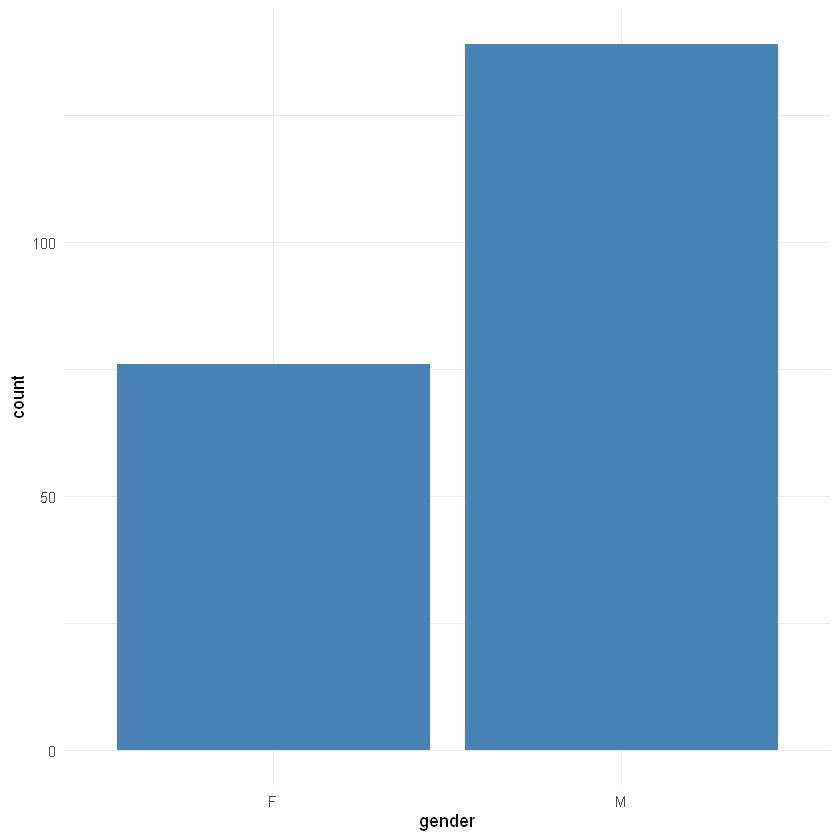

In [14]:
install.packages("ggplot2")
library(ggplot2)

# Histograma de uma variável numérica (ex: 'a')
ggplot(df_original_r, aes(x = gender)) +
  geom_bar(fill = "steelblue") +
  theme_minimal()

# geom_bar() : Cria um gráfico de barras para variáveis categóricas no eixo X
# theme_minimal : Aplica um tema visual limpo e simples ao gráfico.

### Aplicar Label Encoder : Técnica de Codificação de Atributos Categóricos

In [17]:
py_require("scikit-learn")

In [18]:
sklearn <- import("sklearn.preprocessing")

In [20]:
le <- sklearn$LabelEncoder()

##### Colunas Categóricas

In [21]:
categorical_columns <- c("gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status")

##### Aplicar LabelEncoder em cada coluna

In [25]:
for (col in categorical_columns) {
  df_no_salary[[col]] <- le$fit_transform(df_no_salary[[col]])
}

In [26]:
head(df_no_salary)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
,<dbl>,<dbl[1d]>,<dbl>,<dbl[1d]>,<dbl>,<dbl[1d]>,<dbl[1d]>,<dbl>,<dbl[1d]>,<dbl[1d]>,<dbl>,<dbl[1d]>,<dbl>,<dbl[1d]>
1,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
2,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
3,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
4,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
5,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
6,6,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0


##### Selecione um dos modelos de classificação aprendidos até agora na disciplina (Naive Bayes ou Regressão Logística) e treine-o com df_no_salary. Seu objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado]) de cada indivíduo